In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
list_cities = os.listdir("data_processed/Cities")
print(list_cities)

['beijing.csv', 'chicago.csv', 'dubai.csv', 'las-vegas.csv', 'london.csv', 'montreal.csv', 'new-delhi.csv', 'new-york-city.csv', 'san-francisco.csv', 'shanghai.csv']


In [3]:
list_df = []
for i in range (0,len(list_cities)):
    name = list_cities[i]
    df_name = "df_" + name
    locals()[df_name] = pd.read_csv("data_processed/Cities/" + name)
    list_df.append(locals()[df_name])

In [4]:
processed_df = []

for i in range (0, len(list_df)):
    df = list_df[i]
    processed_df.append(df)

In [5]:
final_data = pd.concat(processed_df, axis = 0)

Max length: 1992, Min length: 1, Average Length :  92.82041210711957


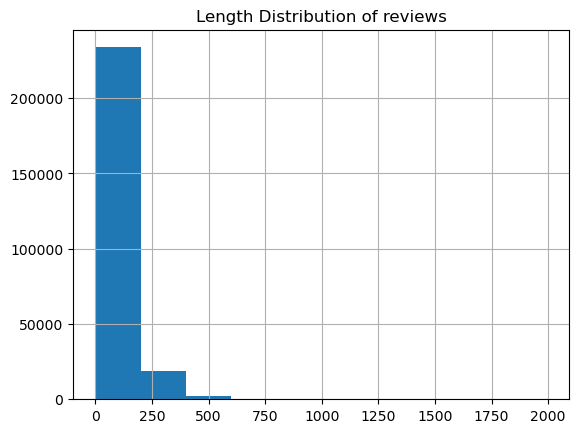

In [6]:
final_data['len']= final_data['Review'].str.split().map(lambda x: len(x))
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(final_data['len']),min(final_data['len']),final_data['len'].mean()))
final_data['len'].hist()
plt.title('Length Distribution of reviews')
plt.show()

In [7]:
import re

df = final_data

text= ' '.join(t for t in df['Review'])

text = re.sub('\n', '', text)
text = re.sub('\?', '', text)
text = re.sub('"', '', text)
text = re.sub("'", '', text)

words_list= text.split()
word_freq= dict()

for word in set(words_list):
  word_freq[word] = 0

for word in words_list:
  word_freq[word] += 1  

df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])
df_word['word_len']= df_word['word'].map(lambda x: len(x))
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word.head()

,word,count,word_len
0,I,793082,1
1,hotel,621446,5
2,room,583053,4
3,not,512572,3
4,stay,341127,4


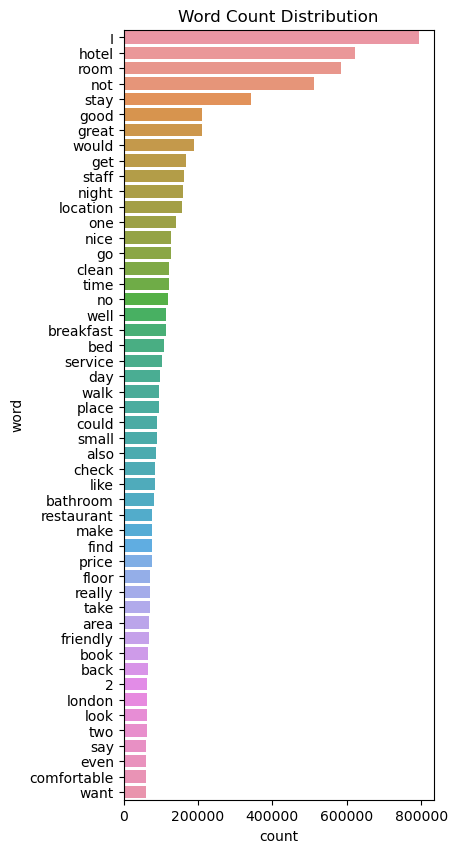

In [8]:
df_top= df_word.head(50)
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(10)
sns.barplot(x=df_top['count'], y=df_top['word'])
plt.title('Word Count Distribution')
plt.show()

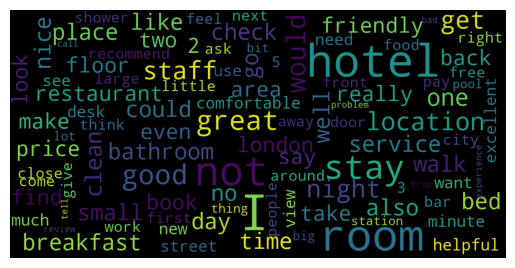

In [9]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',max_words=100 ,max_font_size=40 ,scale=3,random_state=1).generate_from_frequencies(word_freq)
plt.axis("off")
plt.imshow(wordcloud)

In [13]:
print(len(df[df['len'] > 514]))

853


In [14]:
df.shape

(254594, 2)